# Python script from Felix Scheibe, for his MPMD Master's Thesis

This is the Python script from Felix Scheibe, used in his Master's Thesis in Project Management and Data Science (MPMD) at Hochschule für Technik und Wirtschaft Berlin.

Title: The Rise of Python and Qlik Sense in Data Science: Prospects and Limitations - Two Case Studies from the Aviation Industry

First supervisor: Prof. Dr. Tilo Wendler, HTW Berlin
Second supervisor: Prof. Bertil Haack, TH Wildau

# 3 Empirical evaluation: Two case studies from the aviation industry

## 3.1 Clustering passengers and air freight over EU regions

### Data understanding

All chapters of this script correspond to the related chapters of the Master's thesis. The aim is to compare functionalities of Qlik Sense to those of Python. Every single step is explained by comments.

In [1]:
# Import NumPy library for multi-dimensional arrays and matrices
import numpy as np

In [2]:
# Import Pandas library for data analysis
import pandas as pd

In [3]:
# read passenger dataset (tsv file: set tab as delimiter) and add new names for first and last column
passenger_data = pd.read_csv('tgs00077_pas.tsv',delimiter='\t',encoding='utf-8', names=["Region (NUTS 2)", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "Number of passengers (in thousands)"])

In [4]:
# delete first row with old column names
passenger_data = passenger_data.drop([0], axis=0)

In [5]:
# delete all annual columns except 2017
passenger_data = passenger_data.drop(["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"], axis=1)

In [6]:
# get file overview
passenger_data.describe()

,Region (NUTS 2),Number of passengers (in thousands)
count,246,246
unique,246,208
top,"PAS_CRD,THS_PAS,UKD7",:
freq,1,36


In [7]:
# preview first rows
passenger_data.head()

,Region (NUTS 2),Number of passengers (in thousands)
1,"PAS_CRD,THS_PAS,AT12",24333
2,"PAS_CRD,THS_PAS,AT21",216
3,"PAS_CRD,THS_PAS,AT22",952
4,"PAS_CRD,THS_PAS,AT31",391
5,"PAS_CRD,THS_PAS,AT32",1895


In [8]:
# Isolate last 4 characters of the first column for NUTS 2 classification
passenger_data["Region (NUTS 2)"] = passenger_data["Region (NUTS 2)"].str.split(',').str[2]

In [9]:
# Check result
passenger_data.head()

,Region (NUTS 2),Number of passengers (in thousands)
1,AT12,24333
2,AT21,216
3,AT22,952
4,AT31,391
5,AT32,1895


In [10]:
# read air freight dataset (tsv file: set tab as delimiter) and add new names (for first and last column)
freight_data = pd.read_csv('tgs00078_cargo.tsv',delimiter='\t',encoding='utf-8', names=["Region (NUTS 2)", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "Air freight (in thousand tons)"])

In [11]:
# delete first row with old column names
freight_data = freight_data.drop([0], axis=0)

In [12]:
# delete all annual columns except 2017
freight_data = freight_data.drop(["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"], axis=1)

In [13]:
# get file overview
freight_data.describe()

,Region (NUTS 2),Air freight (in thousand tons)
count,235,235
unique,235,71
top,"THS_T,FRM_LD_NLD,ITI3",0
freq,1,79


In [14]:
# preview first rows
freight_data.head()

,Region (NUTS 2),Air freight (in thousand tons)
1,"THS_T,FRM_LD_NLD,AT12",221
2,"THS_T,FRM_LD_NLD,AT21",0
3,"THS_T,FRM_LD_NLD,AT22",0
4,"THS_T,FRM_LD_NLD,AT31",6
5,"THS_T,FRM_LD_NLD,AT32",0


In [15]:
# Isolate last 4 characters of the first column for NUTS 2 classification
freight_data["Region (NUTS 2)"] = freight_data["Region (NUTS 2)"].str.split(',').str[2]

In [16]:
# Check result
freight_data.head()

,Region (NUTS 2),Air freight (in thousand tons)
1,AT12,221
2,AT21,0
3,AT22,0
4,AT31,6
5,AT32,0


In [17]:
# Compare dimensions (rows, columns) of both datasets
print("passenger dimensions: {}".format(passenger_data.shape))
print("freight dimensions: {}".format(freight_data.shape))

passenger dimensions: (246, 2)
freight dimensions: (235, 2)


In [18]:
# Check if all regions of the freight dataset are also in the passenger dataset (yes, they all are)
freight_data['Region (NUTS 2)'].isin(passenger_data['Region (NUTS 2)']).value_counts()

True    235
Name: Region (NUTS 2), dtype: int64

In [19]:
# Check if all regions of the passenger dataset are also in the air freight dataset (no, 11 are not and will become NaN)
passenger_data['Region (NUTS 2)'].isin(freight_data['Region (NUTS 2)']).value_counts()

True     235
False     11
Name: Region (NUTS 2), dtype: int64

In [20]:
# Full outer join of passenger_data and freight_data, only for 2017 data
merged_data = pd.merge(passenger_data,
                       freight_data,                        
                       on='Region (NUTS 2)',
                       how='outer')

In [21]:
# Check result
merged_data.head()

,Region (NUTS 2),Number of passengers (in thousands),Air freight (in thousand tons)
0,AT12,24333,221
1,AT21,216,0
2,AT22,952,0
3,AT31,391,6
4,AT32,1895,0


In [22]:
# Check if 11 missing values from air freight dataset are correct (yes)
print(merged_data.isnull().sum())

Region (NUTS 2)                         0
Number of passengers (in thousands)     0
Air freight (in thousand tons)         11
dtype: int64


In [23]:
# Check data format of columns (all strings)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 3 columns):
Region (NUTS 2)                        246 non-null object
Number of passengers (in thousands)    246 non-null object
Air freight (in thousand tons)         235 non-null object
dtypes: object(3)
memory usage: 7.7+ KB


In [24]:
# Check air freight column for ':', '0' and 'NaN'
merged_data["Air freight (in thousand tons)"].value_counts()

0        79
:        25
1        10
3         9
2         7
7         6
6         5
5         5
9         5
13        3
36        3
10        3
17        3
14        3
11        3
16        2
21        2
41        2
26        2
102       2
42        2
31        2
12        2
87        2
44        2
104       1
55        1
15        1
530       1
98        1
         ..
139       1
380       1
2193      1
1778      1
126       1
696       1
162       1
27        1
1792      1
221       1
145       1
8         1
203       1
379       1
23        1
346       1
19        1
893       1
107       1
450       1
757       1
64        1
112       1
4         1
72        1
82        1
53        1
822       1
219       1
66        1
Name: Air freight (in thousand tons), Length: 71, dtype: int64

In [25]:
# Replace ':' with '0' for passengers
merged_data["Number of passengers (in thousands)"] = merged_data["Number of passengers (in thousands)"].str.replace(':','0')

In [26]:
# Replace ':' with '0' for air freight
merged_data["Air freight (in thousand tons)"] = merged_data["Air freight (in thousand tons)"].str.replace(':','0')

In [27]:
# Replace 'NaN' with '0' for passengers
merged_data["Number of passengers (in thousands)"] = merged_data["Number of passengers (in thousands)"].fillna('0')

In [28]:
# Replace 'NaN' with '0' for air freight
merged_data["Air freight (in thousand tons)"] = merged_data["Air freight (in thousand tons)"].fillna('0')

In [29]:
# Check if 'NaN' and ':' are replaced by '0' for passengers (yes they are)
merged_data["Number of passengers (in thousands)"].value_counts()

0        36
318       2
29356     2
1         2
3886      1
491       1
1621      1
10942     1
3499      1
354       1
10761     1
1090      1
6347      1
2070      1
17269     1
717       1
1869      1
4530      1
38486     1
77987     1
3759      1
5829      1
665       1
18689     1
12        1
2455      1
7         1
12803     1
6249      1
247       1
         ..
24333     1
1493      1
2347      1
935       1
216       1
43879     1
284       1
18981     1
0         1
20        1
3090      1
1842      1
64390     1
8552      1
477       1
1701      1
8319      1
391       1
437       1
4161      1
908       1
694       1
2252      1
1740      1
3555      1
263       1
2375      1
8236      1
2806      1
640       1
Name: Number of passengers (in thousands), Length: 208, dtype: int64

In [30]:
# Check if 'NaN' and ':' are replaced by '0' for air freight (yes they are)
merged_data["Air freight (in thousand tons)"].value_counts()

0        104
0         11
1         10
3          9
2          7
7          6
6          5
9          5
5          5
36         3
14         3
13         3
10         3
17         3
11         3
102        2
12         2
31         2
26         2
42         2
44         2
21         2
87         2
16         2
41         2
15         1
104        1
98         1
221        1
893        1
        ... 
66         1
55         1
530        1
37         1
19         1
126        1
696        1
162        1
27         1
1792       1
145        1
8          1
203        1
379        1
23         1
346        1
107        1
2193       1
450        1
757        1
64         1
112        1
4          1
72         1
380        1
82         1
822        1
219        1
1778       1
53         1
Name: Air freight (in thousand tons), Length: 71, dtype: int64

In [31]:
# Check if ':' and 'NaN' have been replaced by '0' for air freight (yes they are)
merged_data["Air freight (in thousand tons)"].sort_values()

68        0
66        0
67        0
69        0
225       0
227       0
65        0
70        0
72        0
73        0
71        0
113      0 
112      0 
114      0 
111      0 
110      0 
116      0 
122      0 
109      0 
121      0 
134      0 
137      0 
138      0 
117      0 
107      0 
91       0 
102      0 
100      0 
99       0 
94       0 
       ... 
153     57 
3        6 
32       6 
176      6 
207      6 
158      6 
115     64 
74      66 
10     696 
212      7 
174      7 
123      7 
239      7 
150      7 
98       7 
124     72 
127     73 
145    757 
35       8 
20      82 
45     822 
169     87 
136     87 
162    893 
193      9 
217      9 
147      9 
135      9 
173      9 
187     98 
Name: Air freight (in thousand tons), Length: 246, dtype: object

In [32]:
# Convert strings to numeric data (integer) for passengers
merged_data["Number of passengers (in thousands)"] = merged_data["Number of passengers (in thousands)"].astype(int)

In [33]:
# Convert strings to numeric data (integer) for air freight
merged_data["Air freight (in thousand tons)"] = merged_data["Air freight (in thousand tons)"].astype(int)

In [34]:
# Check if passenger and air freight data is converted to integer
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 3 columns):
Region (NUTS 2)                        246 non-null object
Number of passengers (in thousands)    246 non-null int32
Air freight (in thousand tons)         246 non-null int32
dtypes: int32(2), object(1)
memory usage: 5.8+ KB


In [35]:
# Statistical data overview
merged_data.describe()

,Number of passengers (in thousands),Air freight (in thousand tons)
count,246.00000,246.000000
mean,7188.51626,75.922764
std,13684.09325,286.062542
min,0.00000,0.000000
25%,235.00000,0.000000
50%,1780.00000,1.000000
75%,7443.75000,18.500000
max,101458.00000,2260.000000


In [36]:
# Import matplotlib library for data visualization
import matplotlib.pyplot as plt

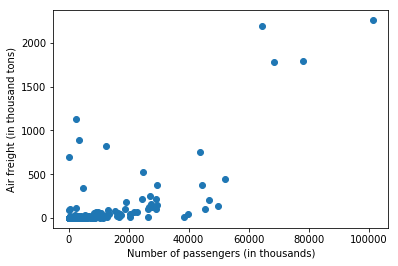

In [37]:
# Scatter plot for both dimensions
fig, ax = plt.subplots()
ax.scatter(merged_data['Number of passengers (in thousands)'], merged_data['Air freight (in thousand tons)'])
ax.set_xlabel('Number of passengers (in thousands)')
ax.set_ylabel('Air freight (in thousand tons)')
plt.show()

In [38]:
# Calculate R and R^2
from scipy import stats
x = merged_data['Number of passengers (in thousands)']
y = merged_data['Air freight (in thousand tons)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value)
print("r-squared:", r_value**2)

r: 0.7296818566896833
r-squared: 0.5324356119821035


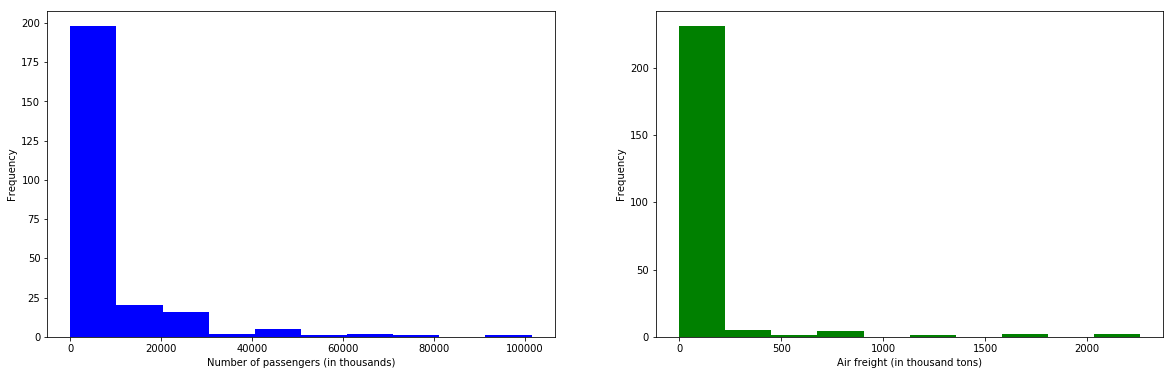

In [39]:
# Histograms for both dimensions
x = merged_data['Number of passengers (in thousands)']
y = merged_data['Air freight (in thousand tons)']

plt.rcParams['figure.figsize'] = (20,6)

fig, ax = plt.subplots(1,2)
ax[0].hist(x, color = 'b')
ax[1].hist(y, color = 'g')

ax[0].set_xlabel("Number of passengers (in thousands)")
ax[0].set_ylabel("Frequency")


ax[1].set_xlabel("Air freight (in thousand tons)")
ax[1].set_ylabel("Frequency")

plt.show()



In [40]:
# Kolmogorov-Smirnov test for normal distribution can be rejected for both dimensions
x = merged_data['Number of passengers (in thousands)']
y = merged_data['Air freight (in thousand tons)']


print("KStest for passengers:", stats.kstest(x, 'norm'))
print("KStest for air freight:", stats.kstest(y, 'norm'))

KStest for passengers: KstestResult(statistic=0.8414634146328664, pvalue=0.0)
KStest for air freight: KstestResult(statistic=0.5, pvalue=0.0)


In [41]:
# Outlier analysis for passengers

outliers=[]
def detect_outlier():
    
    threshold=3
    mean_1 = np.mean(merged_data['Number of passengers (in thousands)'])
    std_1 = np.std(merged_data['Number of passengers (in thousands)'])
    
    for y in merged_data['Number of passengers (in thousands)']:
        z_score = (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
    


outlier_datapoints = detect_outlier()

print(outlier_datapoints)


[64390, 52023, 49750, 101458, 68422, 77987]


In [42]:
# Connect passenger ouliers to regions
df2 = merged_data.set_index("Number of passengers (in thousands)", drop = False)
df2.loc[outlier_datapoints]

,Region (NUTS 2),Number of passengers (in thousands),Air freight (in thousand tons)
Number of passengers (in thousands),,,
64390,DE71,64390,2193
52023,ES30,52023,450
49750,ES51,49750,139
101458,FR10,101458,2260
68422,NL32,68422,1778
77987,UKI7,77987,1792


In [43]:
# Outlier analysis for air freight

outliers2=[]
def detect_outlier2():
    
    threshold=3
    mean_2 = np.mean(merged_data['Air freight (in thousand tons)'])
    std_2 = np.std(merged_data['Air freight (in thousand tons)'])
    
    for y in merged_data['Air freight (in thousand tons)']:
        z_score = (y - mean_2)/std_2
        if np.abs(z_score) > threshold:
            outliers2.append(y)
    return outliers2
    


outlier_datapoints2 = detect_outlier2()

print(outlier_datapoints2)

[2193, 1130, 2260, 1778, 1792]


In [44]:
# Connect air freight ouliers to regions
df3 = merged_data.set_index("Air freight (in thousand tons)", drop = False)
df3.loc[outlier_datapoints2]

,Region (NUTS 2),Number of passengers (in thousands),Air freight (in thousand tons)
Air freight (in thousand tons),,,
2193,DE71,64390,2193
1130,DED5,2347,1130
2260,FR10,101458,2260
1778,NL32,68422,1778
1792,UKI7,77987,1792


In [45]:
# Renaming the region column, just because it's faster to write
merged_data = merged_data.rename(columns={"Region (NUTS 2)": "Region"})

### Data preparation

In [46]:
# Delete 7 outliers in total

merged_data = merged_data.set_index("Region")

merged_data = merged_data.drop(["DE71", "ES30", "ES51", "FR10", "NL32", "UKI7", "DED5"], axis=0)

In [47]:
# Check how dataset changes
merged_data.describe()

,Number of passengers (in thousands),Air freight (in thousand tons)
count,239.000000,239.000000
mean,5656.895397,37.384937
std,9292.381356,118.545857
min,0.000000,0.000000
25%,220.500000,0.000000
50%,1651.000000,1.000000
75%,6298.000000,15.500000
max,46692.000000,893.000000


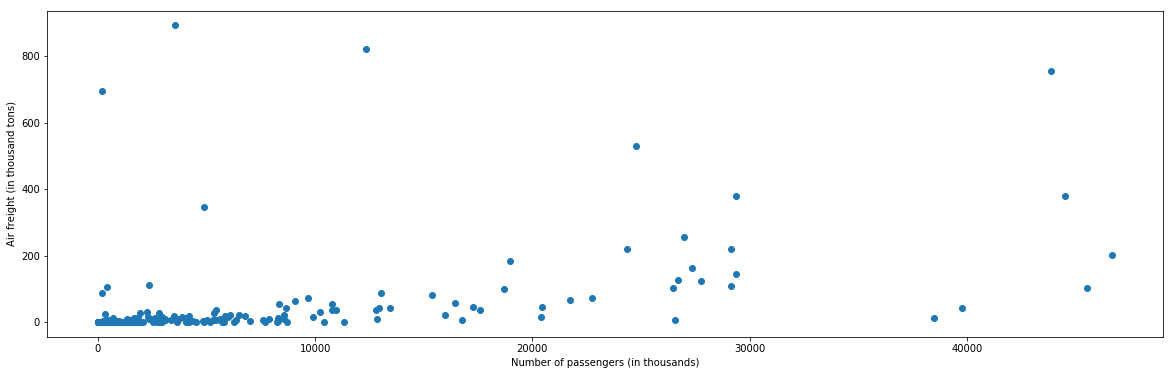

In [48]:
# Scatter plot for both dimensions
fig, ax = plt.subplots()
ax.scatter(merged_data['Number of passengers (in thousands)'], merged_data['Air freight (in thousand tons)'])
ax.set_xlabel('Number of passengers (in thousands)')
ax.set_ylabel('Air freight (in thousand tons)')
plt.show()

In [49]:
# Calculate R and R^2
from scipy import stats
x = merged_data['Number of passengers (in thousands)']
y = merged_data['Air freight (in thousand tons)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value)
print("r-squared:", r_value**2)

r: 0.45249584356768213
r-squared: 0.20475248844602825


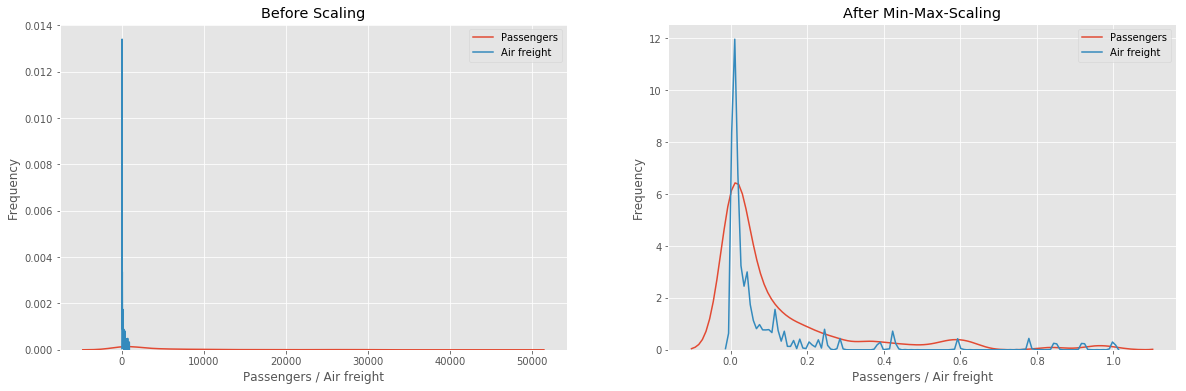

In [50]:
# Min-Max-Scaling to bring both dimensions in the range between 0 and 1

from sklearn import preprocessing
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')



from sklearn import preprocessing
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')


df = pd.DataFrame({
    'Passengers': merged_data['Number of passengers (in thousands)'],
    'Air freight': merged_data['Air freight (in thousand tons)']

})



scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['Air freight', 'Passengers'])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
ax1.set_title('Before Scaling')
ax1.set_xlabel("Passengers / Air freight")
ax1.set_ylabel("Frequency")
sns.kdeplot(df['Passengers'], ax=ax1)
sns.kdeplot(df['Air freight'], ax=ax1)
ax2.set_title('After Min-Max-Scaling')
ax2.set_xlabel("Passengers / Air freight")
ax2.set_ylabel("Frequency")
sns.kdeplot(scaled_df['Passengers'], ax=ax2)
sns.kdeplot(scaled_df['Air freight'], ax=ax2)
plt.show()

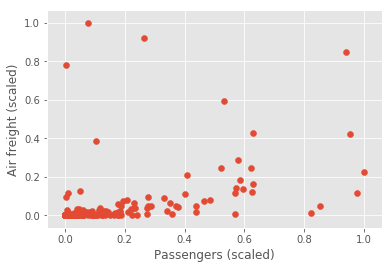

In [51]:
# Scatter plot for both dimensions remains unchanged after scaling
fig, ax = plt.subplots()
ax.scatter(scaled_df['Passengers'], scaled_df['Air freight'])
ax.set_xlabel('Passengers (scaled)')
ax.set_ylabel('Air freight (scaled)')
plt.show()

In [52]:
# Calculate R and R^2 after scaling

x = scaled_df['Passengers']
y = scaled_df['Air freight']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value)
print("r-squared:", r_value**2)

r: 0.45249584356768335
r-squared: 0.20475248844602936


### Modelling

[[0.82821948 0.36307719]
 [0.1324988  0.56644607]
 [0.01045891 0.05475627]]


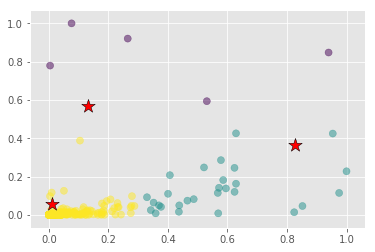

In [53]:
# K-means clustering of the scaled dataset

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=100).fit(scaled_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(scaled_df['Passengers'], scaled_df['Air freight'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*', edgecolor='black', label = 'Centroids')

### Model evaluation

In [54]:
# Finding optimal number of clusters by elbow method
from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Calculating distortion for 1-10 clusters 
    kmeanModel = KMeans(n_clusters=k).fit(scaled_df) 
    kmeanModel.fit(scaled_df)     
      
    distortions.append(sum(np.min(cdist(scaled_df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / scaled_df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(scaled_df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / scaled_df.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [55]:
# Print distortions for 1-10 clusters
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.15975184561499264
2 : 0.09254732532293285
3 : 0.0810917407489095
4 : 0.06088500964435725
5 : 0.05256215311988548
6 : 0.048182829320780905
7 : 0.039826082855792255
8 : 0.03816156061025621
9 : 0.036238123819232484


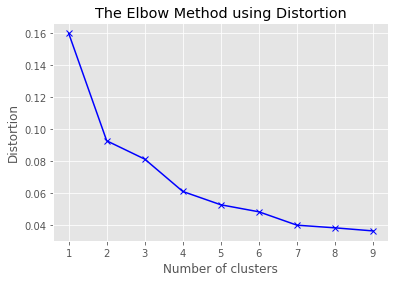

In [56]:
# Plotting the elbow chart
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Number of clusters') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 
